# **[Part 5] Comparing Regressors**

In Part 5, we will be comparing several ML algorithms for build regression models Sars Coronavirus 3-C like proteinase.



## **1. Import libraries**

In [1]:
! pip install lazypredict

     |████████████████████████████████| 72 kB 788 kB/s 
     |████████████████████████████████| 10.1 MB 8.1 MB/s 
     |████████████████████████████████| 1.2 MB 48.2 MB/s 
     |████████████████████████████████| 127.6 MB 19 kB/s 
     |████████████████████████████████| 269 kB 74.7 MB/s 
     |████████████████████████████████| 14.5 MB 38.6 MB/s 
     |████████████████████████████████| 25.9 MB 1.7 MB/s 
     |████████████████████████████████| 6.8 MB 27.2 MB/s 
     |████████████████████████████████| 302 kB 43.5 MB/s 
     |████████████████████████████████| 248 kB 54.4 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=00890d8b65e706141fc26d882a3eade36a5a8ca1670d95a0347a6d1e1c5dae1e
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully u

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


## **2. Load the data set**


In [2]:
df = pd.read_csv('coronavirus_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [3]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [4]:
# Examine X dimension
X.shape          # (133, 881) ie there are 133 rows ie no of compounds and 881 features

(133, 881)

In [5]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(133, 200)

In [15]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [16]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:00<00:00, 83212.46it/s]


In [17]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,40556223552903594458556845506403594912417707989...,-3669372607167467790056713089509703880018074414...,3364512633376625488325933450333822869192048640.00,0.26
KernelRidge,7.39,-4.78,4.22,0.03
LassoLars,2.11,0.00,1.76,0.05
DummyRegressor,2.11,0.00,1.76,0.02
Lasso,1.95,0.14,1.63,0.03
PassiveAggressiveRegressor,1.79,0.28,1.49,0.03
ElasticNet,1.69,0.38,1.38,0.03
LassoLarsIC,1.66,0.40,1.36,0.04
SVR,1.57,0.49,1.26,0.03


In [18]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,


## **5. Data visualization of model performance**

[(0.0, 1.0)]

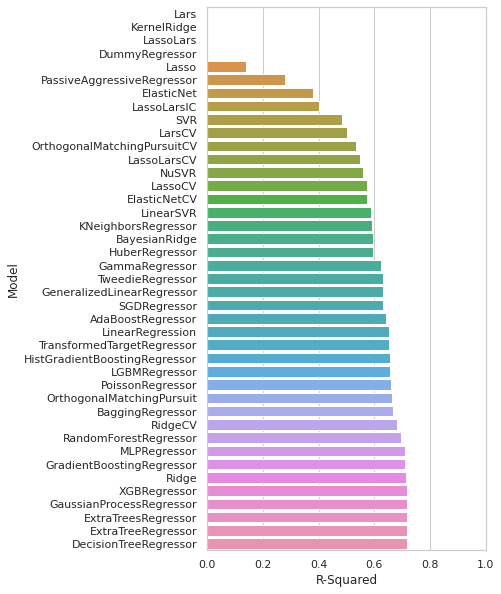

In [19]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

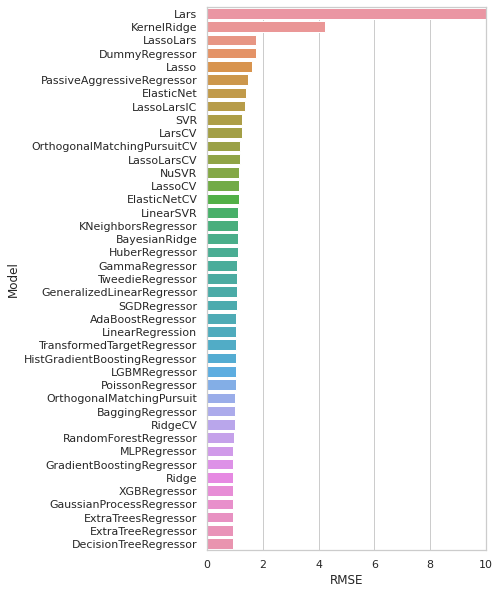

In [20]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

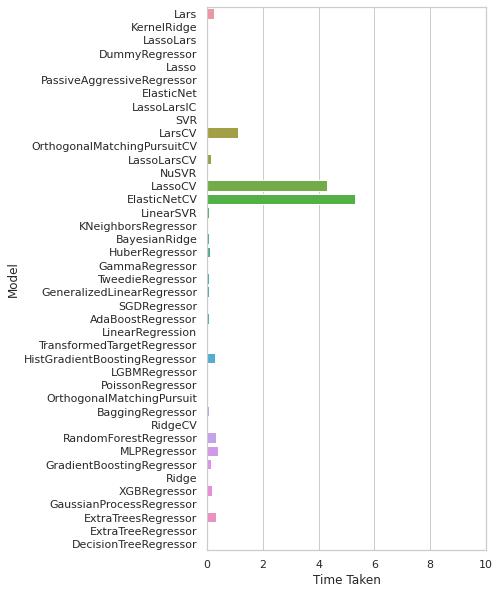

In [21]:
# Bar plot of calculation time (The longers the bars, longer it takes to build the model)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))